In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pmdarima

import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('sp500sub.csv', index_col = 'Date', parse_dates = True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225077 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225077 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,225070.0,7.398487e+01,8.910279e+01,3.000000e-03,3.173000e+01,5.452082e+01,8.616587e+01,1.271000e+03
High,225070.0,7.467853e+01,8.986667e+01,3.000000e-03,3.206029e+01,5.505000e+01,8.695000e+01,1.273890e+03
Low,225070.0,7.327232e+01,8.829942e+01,1.400000e-03,3.139000e+01,5.400000e+01,8.541000e+01,1.249020e+03
Close,225070.0,7.399509e+01,8.909740e+01,3.000000e-03,3.174000e+01,5.456000e+01,8.618000e+01,1.268330e+03
Adj Close,225070.0,1.658033e+22,1.305523e+24,-5.636207e+23,2.721984e+01,4.760000e+01,7.667865e+01,1.018275e+26
Volume,225070.0,5.838934e+06,1.311887e+07,0.000000e+00,1.204600e+06,2.562900e+06,5.600525e+06,5.735764e+08


In [9]:
goog = df[df['Name'] == 'GOOG']['Close']

<Axes: xlabel='Date'>

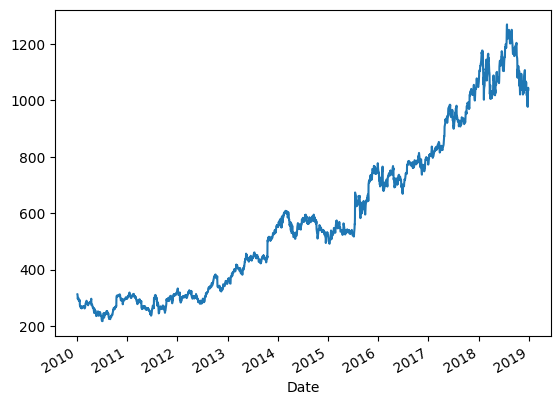

In [10]:
goog.plot()

In [12]:
Ntest = 50
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [13]:
model = pm.auto_arima(train,
                      seasonal = False,
                      trace = True, suppress_warnings = True,
                      maxiter = 10, error_action = 'ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15975.348, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15973.446, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15970.138, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15970.034, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15975.144, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15970.993, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15971.772, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15973.926, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15971.403, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 4.436 seconds


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2213
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -7982.017
Date:                Wed, 13 Mar 2024   AIC                          15970.034
Time:                        03:28:05   BIC                          15987.139
Sample:                             0   HQIC                         15976.282
                               - 2213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3664      0.200      1.834      0.067      -0.025       0.758
ma.L1          0.0502      0.012      4.031      0.000       0.026       0.075
sigma2        79.7692      0.934     85.362      0.000      77.938      81.601
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13145.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.20   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [21]:
def plot_results(model, fulldata, train,test):
  params = model.get_params()

  d = params['order'][1]


  train_pred = model.predict_in_sample(start = d, end = -1)
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize = (10,5))
  ax.plot(fulldata.index, fulldata, label = 'data')
  ax.plot(train.index[d:], train_pred, label = 'fitted')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, \
                  confint[:, 0], confint[:,1], \
                  color = 'blue', alpha = 0.3)

  ax.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


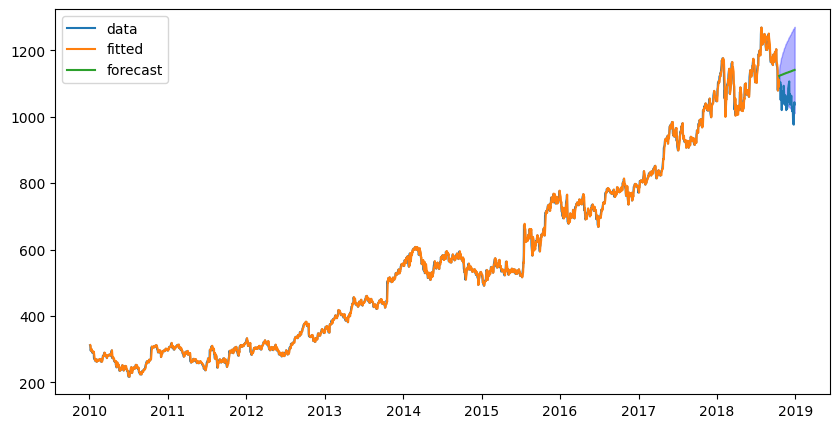

In [22]:
plot_results(model, goog, train, test)

In [27]:
def plot_test(model,test):
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize = (10,5))
  ax.plot(test.index, test, label = 'data')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, \
                  confint[:, 0], confint[:,1], \
                  color = 'blue', alpha = 0.3)

  ax.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


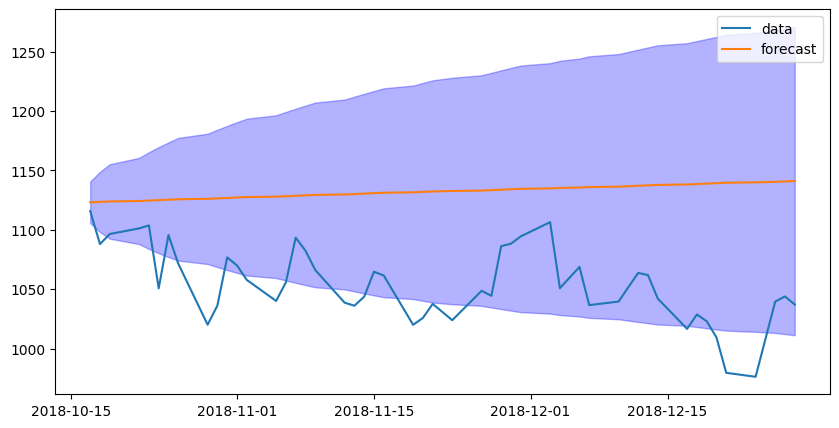

In [28]:
plot_test(model, test)

In [32]:
def rmse(t, y):
  return np.sqrt(np.mean((t-y)**2))

In [34]:
print("ARIMA RMSE : ", rmse(model.predict(Ntest), test))
print("NAIVE RMSE : ", rmse(train.iloc[-1], test))

ARIMA RMSE :  nan
NAIVE RMSE :  73.79425846176073


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [35]:
apple = df[df['Name'] == 'AAPL']['Close']

<Axes: xlabel='Date'>

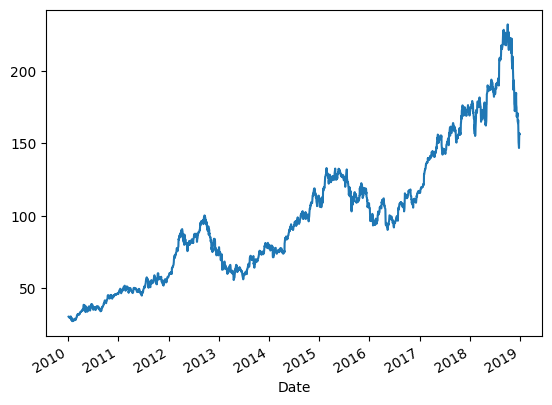

In [36]:
apple.plot()

In [39]:
Ntest = 30
train = apple.iloc[:-Ntest]
test = apple.iloc[-Ntest:]

In [40]:
model = pm.auto_arima(train,
                      seasonal = False,
                      trace = True, suppress_warnings = True,
                      maxiter = 10, error_action = 'ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.89 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=1.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=1.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=1.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=2.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=2.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=1.51 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.43 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Wed, 13 Mar 2024   AIC                           8570.296
Time:                        03:42:23   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


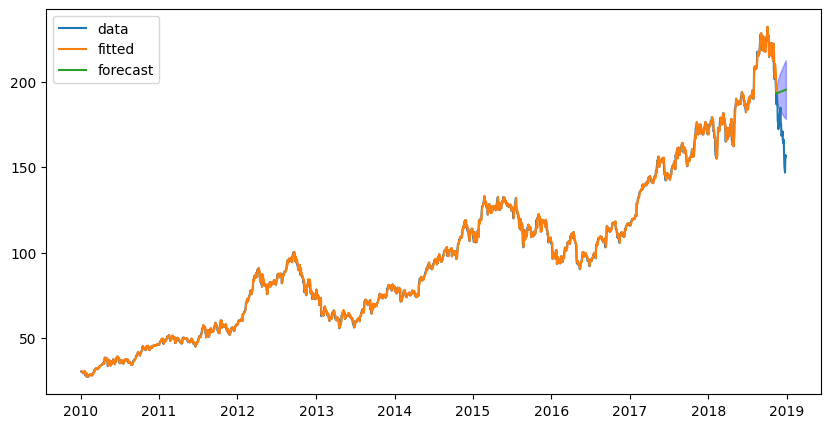

In [43]:
plot_results(model, apple, train, test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


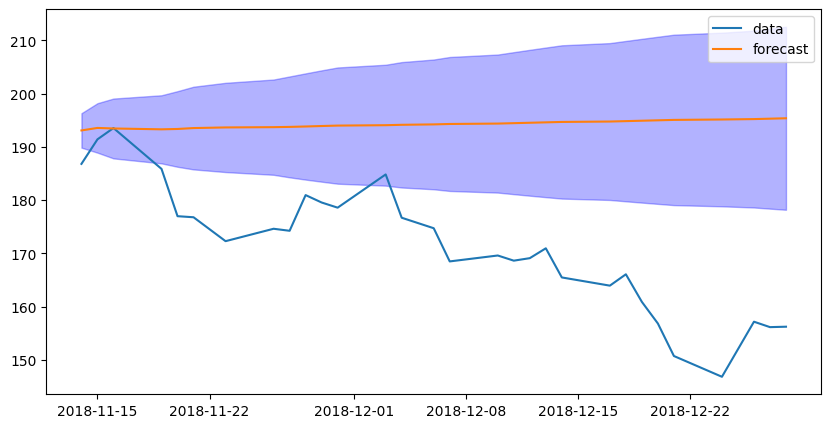

In [44]:
plot_test(model, test)

In [45]:
print("ARIMA RMSE : ", rmse(model.predict(Ntest), test))
print("NAIVE RMSE : ", rmse(train.iloc[-1], test))

ARIMA RMSE :  nan
NAIVE RMSE :  24.02712058667382


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
IBM = df[df['Name'] == 'IBM']['Close']

<Axes: xlabel='Date'>

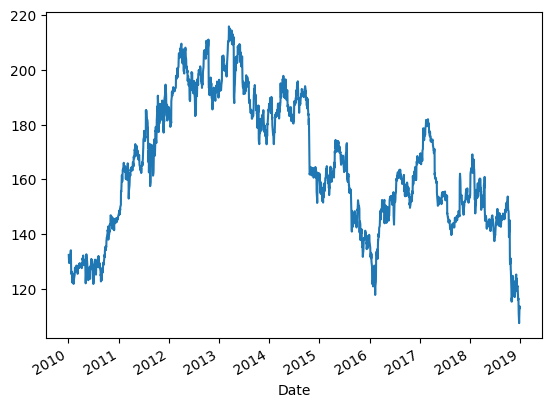

In [47]:
IBM.plot()

In [48]:
Ntest = 30
train = IBM.iloc[:-Ntest]
test = IBM.iloc[-Ntest:]

In [49]:
model = pm.auto_arima(train,
                      seasonal = False,
                      trace = True, suppress_warnings = True,
                      maxiter = 10, error_action = 'ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=1.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.704 seconds


In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Wed, 13 Mar 2024   AIC                           9434.097
Time:                        03:44:39   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


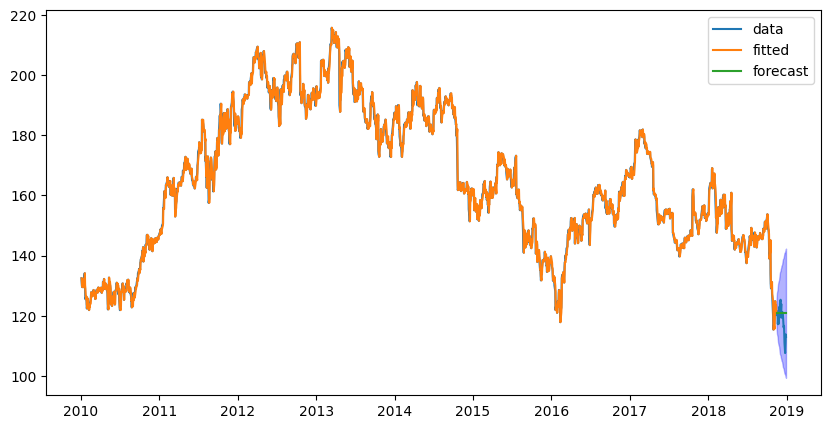

In [51]:
plot_results(model, IBM, train, test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


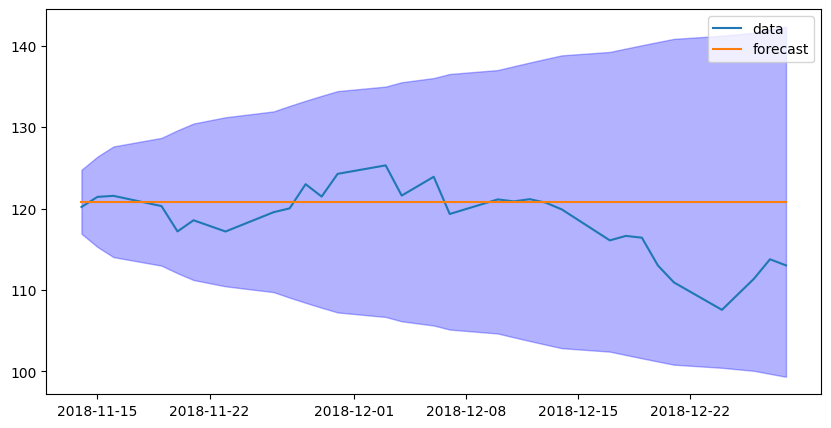

In [52]:
plot_test(model, test)